In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lmfit

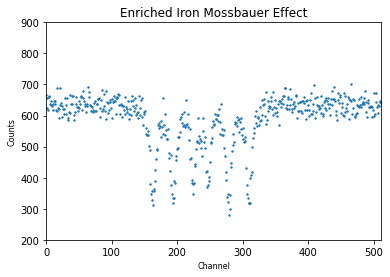

[[Model]]
    (((((Model(lorentzian, prefix='L1_') + Model(lorentzian, prefix='L2_')) + Model(lorentzian, prefix='L3_')) + Model(lorentzian, prefix='L4_')) + Model(lorentzian, prefix='L5_')) + Model(lorentzian, prefix='L6_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6557
    # data points      = 512
    # variables        = 18
    chi-square         = 1674070.08
    reduced chi-square = 3388.80583
    Akaike info crit   = 4179.33121
    Bayesian info crit = 4255.62105
[[Variables]]
    L6_amplitude:  247610.935 +/- 155668.791 (62.87%) (init = 1)
    L6_center:     17.2297544 +/- 11.7864029 (68.41%) (init = 0)
    L6_sigma:      142.478225 +/- 76.9485220 (54.01%) (init = 1)
    L6_fwhm:       284.956450 +/- 153.897044 (54.01%) == '2.0000000*L6_sigma'
    L6_height:     553.186370 +/- 57.3500755 (10.37%) == '0.3183099*L6_amplitude/max(1e-15, L6_sigma)'
    L1_amplitude:  3132.77968 +/- 2783.93164 (88.86%) (init = 1)
    L1_center:     332.418166 +/- 2.

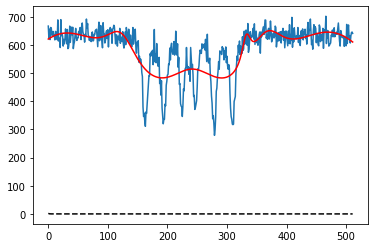

In [13]:
enriched = np.loadtxt('22421b enriched.txt')
plt.scatter(enriched[0],enriched[1], s=2)
plt.xlim(0,511)
plt.ylim(200,900)
plt.title("Enriched Iron Mossbauer Effect", fontsize=12)
plt.xlabel('Channel', fontsize=8)
plt.ylabel('Counts',fontsize=8)
plt.show()

from lmfit.models import LorentzianModel
x = enriched[0,:]
y = enriched[1,:]

pars.update( L1_mod.make_params())
L1_mod = LorentzianModel(prefix='L1_')
pars.update( L2_mod.make_params())
L2_mod = LorentzianModel(prefix='L2_')
pars.update( L3_mod.make_params())
L3_mod = LorentzianModel(prefix='L3_')
pars.update( L4_mod.make_params())
L4_mod = LorentzianModel(prefix='L4_')
pars.update( L5_mod.make_params())
L5_mod = LorentzianModel(prefix='L5_')
pars.update( L6_mod.make_params())
L6_mod = LorentzianModel(prefix='L6_')

mod = L1_mod + L2_mod + L3_mod + L4_mod + L5_mod + L6_mod
init = mod.eval(pars, x=x)
plt.plot(x,y)
plt.plot(x, init, 'k--')
out = mod.fit(y, pars, x=x)
print(out.fit_report(min_correl=0.5))
plt.plot(x, out.best_fit, 'r-')
plt.show()

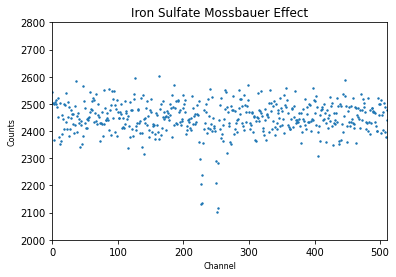

[[Model]]
    (Model(lorentzian, prefix='L1_') + Model(lorentzian, prefix='L2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 770
    # data points      = 512
    # variables        = 18
    chi-square         = 1921759.87
    reduced chi-square = 3890.20216
    Akaike info crit   = 4249.97878
    Bayesian info crit = 4326.26862
##  Warning: uncertainties could not be estimated:
    L6_amplitude:  at initial value
    L6_sigma:      at initial value
    L3_amplitude:  at initial value
    L3_sigma:      at initial value
    L4_amplitude:  at initial value
    L4_sigma:      at initial value
    L5_amplitude:  at initial value
    L5_sigma:      at initial value
[[Variables]]
    L6_amplitude:  1.00000000 (init = 1)
    L6_center:     0.00000000 (init = 0)
    L6_sigma:      1.00000000 (init = 1)
    L6_fwhm:       2.00000000 == '2.0000000*L6_sigma'
    L6_height:     0.31830990 == '0.3183099*L6_amplitude/max(1e-15, L6_sigma)'
    L1_amplitude:  1691330.

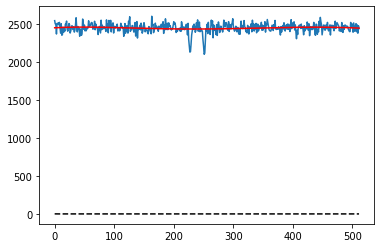

In [16]:
feso4 = np.loadtxt('22421a feso4.txt')
plt.scatter(feso4[0],feso4[1], s=2)
plt.xlim(0,511)
plt.ylim(2000,2800)
plt.title("Iron Sulfate Mossbauer Effect", fontsize=12)
plt.xlabel('Channel', fontsize=8)
plt.ylabel('Counts',fontsize=8)
plt.show()


from lmfit.models import LorentzianModel
x = feso4[0,:]
y = feso4[1,:]

pars.update( L1_mod.make_params())
L1_mod = LorentzianModel(prefix='L1_')
pars.update( L2_mod.make_params())
L2_mod = LorentzianModel(prefix='L2_')
mod = L1_mod + L2_mod
init = mod.eval(pars, x=x)
plt.plot(x,y)
plt.plot(x, init, 'k--')
out = mod.fit(y, pars, x=x)
print(out.fit_report(min_correl=0.5))
plt.plot(x, out.best_fit, 'r-')
plt.show()

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 268
    # data points      = 1024
    # variables        = 3
    chi-square         = 1.4044e+09
    reduced chi-square = 1375479.38
    Akaike info crit   = 14476.5320
    Bayesian info crit = 14491.3264
[[Variables]]
    amplitude:  2.3691e+10 +/- 8.0214e+12 (33858.98%) (init = -11000)
    center:    -59378.5095 +/- 37234286.0 (62706.67%) (init = 0)
    sigma:      205447.855 +/- 58831743.3 (28635.85%) (init = 3.5)
    fwhm:       410895.709 +/- 1.1766e+08 (28635.85%) == '2.0000000*sigma'
    height:     36704.9943 +/- 1917166.86 (5223.18%) == '0.3183099*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  1.000
    C(amplitude, center) = -1.000
    C(center, sigma)     = -1.000


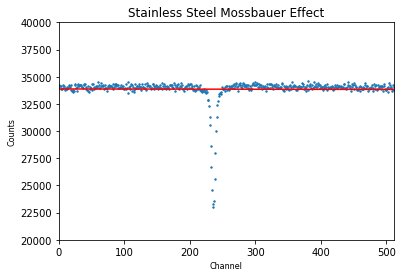

In [10]:
stainless = np.loadtxt('22421d stainless overnight.txt')
from lmfit.models import LorentzianModel

x = stainless[0,:]
y = stainless[1,:]
mod = LorentzianModel()
pars = mod.make_params(amplitude = -11000, center = 0, height = 34000, sigma = 3.5)
out = mod.fit(y, pars, x=x)
print(out.fit_report())


plt.scatter(stainless[0],stainless[1], s=2)
plt.plot(x,out.best_fit, 'r-')
plt.xlim(0,511)
plt.ylim(20000,40000)
plt.title("Stainless Steel Mossbauer Effect", fontsize=12)
plt.xlabel('Channel', fontsize=8)
plt.ylabel('Counts',fontsize=8)
plt.show()
